<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/Admission_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Data/Admission_Predict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


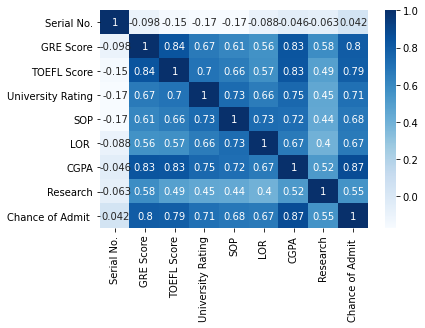

In [9]:
sns.heatmap(df.corr(),annot=True, cmap='Blues')
#CGPA and chance of admit have high correlation factor.
#TOEFL score and GRE score come next
#CGPA and GRE score third along with CGPA nad TOEFL score.
#Chance of admit and GRE score also have a high correlation factor comparatively.

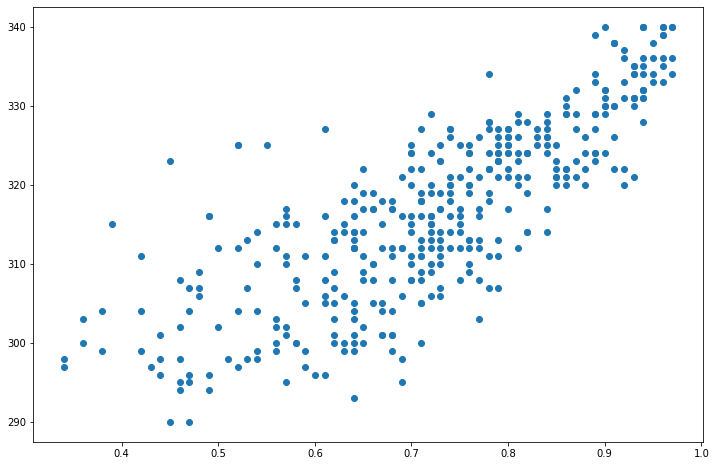

In [16]:
plt.subplots(figsize=(12,8))
plt.scatter(df["Chance of Admit "],df["CGPA"])
#plt.scatter(df["TOEFL Score"],df["GRE Score"])
#plt.scatter(df["CGPA"],df["GRE Score"])

#plt.scatter(df["Chance of Admit "],df["GRE Score"])
#plt.xlabel("Chance of Admit")
#plt.ylabel("GRE Score")

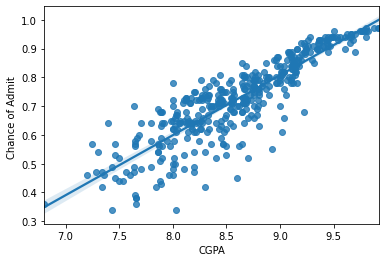

In [21]:
sns.regplot(x="CGPA", y="Chance of Admit ", data=df)
#sns.regplot(x="GRE Score", y="Chance of Admit ", data=df)

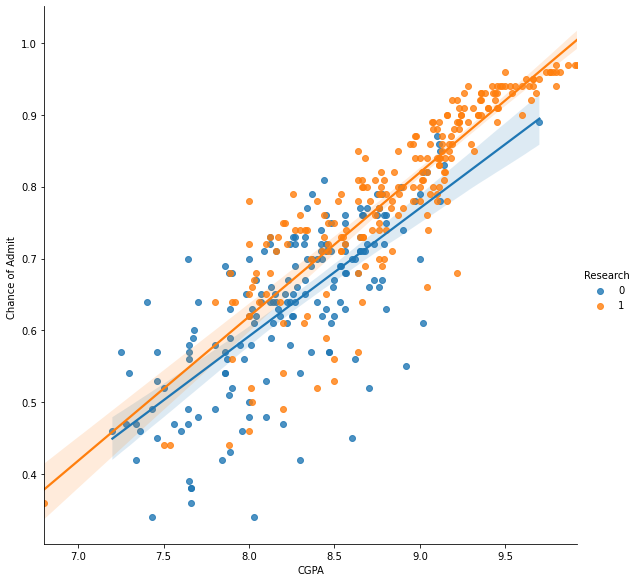

In [23]:
sns.lmplot(x="CGPA", y="Chance of Admit ", data=df, hue="Research",height= 8)#more CGPA more research experience

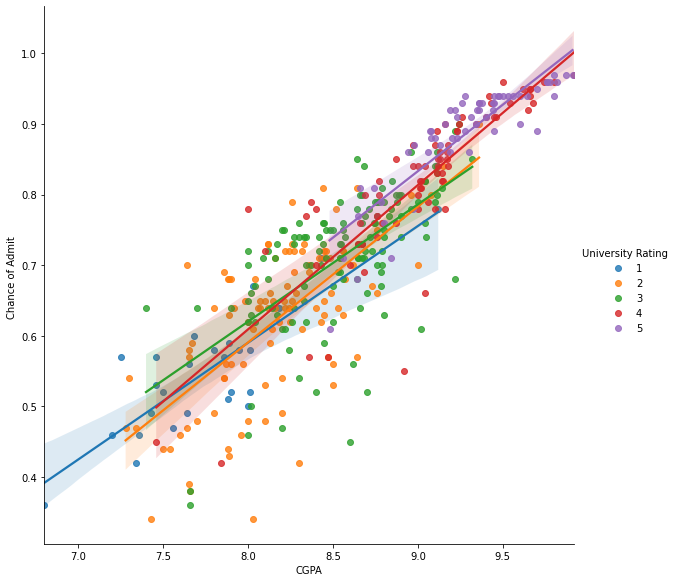

In [25]:
sns.lmplot(x="CGPA", y="Chance of Admit ", data=df, hue="University Rating",height=8) 
#better university rating, students with better CGPA have more chances of admit.
#but, average CGPA is not hindering the students from getting into a fairly goo-rated university.

In [26]:
admit_high_chance= df[df["Chance of Admit "]>=0.8]

In [27]:
admit_high_chance.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
3,4,322,110,3,3.5,2.5,8.67,1,0.80
5,6,330,115,5,4.5,3.0,9.34,1,0.90
11,12,327,111,4,4.0,4.5,9.00,1,0.84
22,23,328,116,5,5.0,5.0,9.50,1,0.94


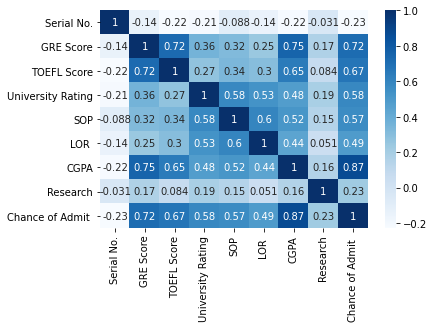

In [28]:
sns.heatmap(admit_high_chance.corr(),annot=True, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


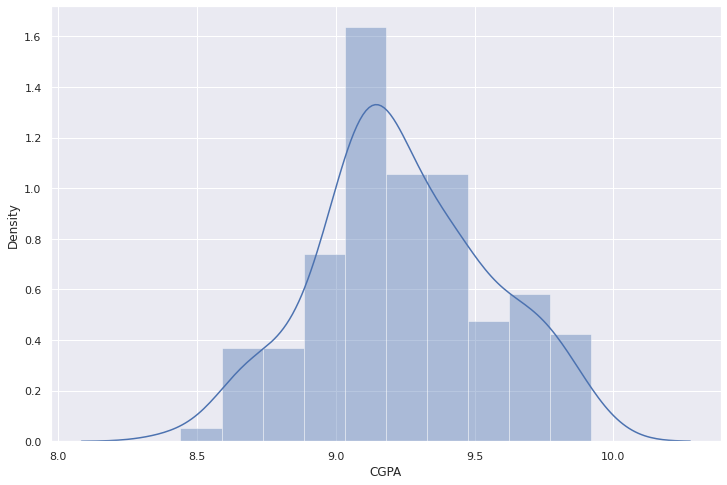

In [31]:
plt.subplots(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.distplot( admit_high_chance["CGPA"])
#sns.distplot( df["CGPA"])
